In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo de Excel
data = pd.read_excel('Prueba_Analista.xlsx', sheet_name='Consultas')



In [33]:
# Información general sobre los datos
data = data.drop('Fecha Autorización', axis=1)
informacion_general = data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Placa                      316 non-null    object        
 1   Fabricante_x               316 non-null    object        
 2   Año Modelo                 316 non-null    int64         
 3   Fecha Autorización Mod     316 non-null    datetime64[ns]
 4   Fecha de Ingreso a Taller  316 non-null    datetime64[ns]
 5   Razon Social Taller        316 non-null    object        
 6   Ciudad Taller              316 non-null    object        
 7   Valor_Total                316 non-null    float64       
 8   Taller_Autorizado          316 non-null    object        
 9   Placa_asegurada            316 non-null    object        
 10  Cumplimiento               316 non-null    object        
 11  Tiempo autorización        316 non-null    int64         
dtypes: datet

In [34]:
# Estadísticas descriptivas
estadisticas_descriptivas = data.describe()
pd.options.display.float_format = '{:.0f}'.format
print(estadisticas_descriptivas)

       Año Modelo         Fecha Autorización Mod Fecha de Ingreso a Taller  \
count         316                            316                       316   
mean         2021  2023-07-12 04:19:44.810126592       2023-07-09 12:00:00   
min          2006            2023-01-01 00:00:00       2023-01-01 00:00:00   
25%          2021            2023-03-01 00:00:00       2023-03-01 00:00:00   
50%          2022            2023-07-01 00:00:00       2023-07-01 00:00:00   
75%          2023            2023-11-01 00:00:00       2023-11-01 00:00:00   
max          2025            2024-05-01 00:00:00       2024-05-01 00:00:00   
std             3                            NaN                       NaN   

       Valor_Total  Tiempo autorización  
count          316                  316  
mean       4885333                    3  
min           4055                    0  
25%        1372317                    0  
50%        3226231                    0  
75%        6160144                    0  
max

In [35]:
frecuencia = data['Fabricante_x'].value_counts()

# Calcular los porcentajes
porcentaje = data['Fabricante_x'].value_counts(normalize=True) * 100

# Crear un DataFrame con las estadísticas
estadisticas = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje': porcentaje})

print(estadisticas)

              Frecuencia  Porcentaje
Fabricante_x                        
MAZDA                120          38
SUZUKI               112          35
CITROEN               35          11
RENAULT               25           8
TOYOTA                 8           3
HYUNDAI                6           2
HONDA                  6           2
CHEVROLET              3           1
KIA                    1           0


In [28]:
# Verificar valores nulos
valores_nulos = data.isnull().sum()

print(valores_nulos)

Placa                        0
Fabricante_x                 0
Año Modelo                   0
Fecha Autorización Mod       0
Fecha de Ingreso a Taller    0
Razon Social Taller          0
Ciudad Taller                0
Valor_Total                  0
Taller_Autorizado            0
Placa_asegurada              0
Cumplimiento                 0
Tiempo autorización          0
dtype: int64


In [5]:
# Verificar integridad de los datos
integridad = data.apply(lambda x: np.logical_not(x.isnull().any()), axis=1).sum() / len(data) * 100

print(integridad)

98.14814814814815


In [6]:
placas_aseguradas = pd.read_excel('Prueba_Analista.xlsx', sheet_name='Placas_Aseguradas')
talleres_autorizados = pd.read_excel('Prueba_Analista.xlsx', sheet_name='Talleres_Autorizados')



In [7]:
# Verificar si la ciudad del taller está en la hoja de Talleres_Autorizados
talleres_no_autorizados = data[~data['Razon Social Taller'].isin(talleres_autorizados['Taller_Reparaciones'])]['Razon Social Taller'].tolist()

# Verificar si la placa está en la hoja de Placas_Aseguradas
placas_no_aseguradas = data[~data['Placa'].isin(placas_aseguradas['PLACAS_ASEGURADAS'])]['Placa'].tolist()

In [8]:

valores_unicos = set(talleres_no_autorizados)
print(valores_unicos)

{'Taller_28', 'Taller_18', 'Taller_19', 'Taller_20', 'Taller_23', 'Taller_31', 'Taller_17', 'Taller_32', 'Taller_29', 'Taller_26', 'Taller_25', 'Taller_21', 'Taller_24', 'Taller_30', 'Taller_27', 'Taller_22'}


In [9]:
# Crear un DataFrame vacío para almacenar los resultados
resultados = pd.DataFrame(columns=['Razon Social Taller', 'Cantidad', 'Valor_Total_Sum'])

# Iterar sobre los valores únicos y buscar en la columna 'Razon Social Taller'
for valor in valores_unicos:
    # Filtrar la data por el valor único
    filtrado = data[data['Razon Social Taller'] == valor]
    
    # Contar las veces que aparece y sumar el valor total
    cantidad = len(filtrado)
    valor_total_sum = filtrado['Valor_Total'].sum()
    
    # Crear un nuevo DataFrame con los resultados
    nuevo_df = pd.DataFrame({'Razon Social Taller': [valor], 'Cantidad': [cantidad], 'Valor_Total_Sum': [valor_total_sum]})
    
    # Concatenar el nuevo DataFrame al DataFrame de resultados
    resultados = pd.concat([resultados, nuevo_df], ignore_index=True)

# Mostrar los resultados
pd.options.display.float_format = '{:.2f}'.format
resultados = resultados.sort_values(by='Cantidad', ascending=False)
print(resultados)


   Razon Social Taller Cantidad  Valor_Total_Sum
1            Taller_18      117     535391949.85
0            Taller_28        2       4021271.89
3            Taller_20        2       8218039.14
6            Taller_17        2       5400628.69
2            Taller_19        1       6902496.40
4            Taller_23        1      17090872.82
5            Taller_31        1       4939714.13
7            Taller_32        1      29974980.03
8            Taller_29        1      17254676.67
9            Taller_26        1       7729468.40
10           Taller_25        1             0.00
11           Taller_21        1       3106345.39
12           Taller_24        1      13149368.18
13           Taller_30        1      45205322.56
14           Taller_27        1       4561893.24
15           Taller_22        1       2842455.29


In [10]:
valores_placas = set(placas_no_aseguradas)
print(valores_placas)

{'Placa_135', 'Placa_89', 'Placa_7', 'Placa_221', 'Placa_45', 'Placa_49', 'Placa_120', 'Placa_158', 'Placa_54', 'Placa_256', 'Placa_231', 'Placa_13', 'Placa_83', 'Placa_257', 'Placa_81', 'Placa_199', 'Placa_47', 'Placa_191', 'Placa_43', 'Placa_177', 'Placa_269', 'Placa_293', 'Placa_139', 'Placa_24', 'Placa_108', 'Placa_244', 'Placa_138', 'Placa_20', 'Placa_262', 'Placa_290', 'Placa_195', 'Placa_188', 'Placa_268', 'Placa_239', 'Placa_60', 'Placa_171', 'Placa_205', 'Placa_126', 'Placa_96', 'Placa_104', 'Placa_11', 'Placa_194', 'Placa_259', 'Placa_71', 'Placa_12', 'Placa_154', 'Placa_123', 'Placa_122', 'Placa_116', 'Placa_113', 'Placa_91', 'Placa_251', 'Placa_285', 'Placa_235', 'Placa_266', 'Placa_63', 'Placa_32', 'Placa_163', 'Placa_219', 'Placa_77', 'Placa_3', 'Placa_228', 'Placa_137', 'Placa_52', 'Placa_215', 'Placa_129', 'Placa_35', 'Placa_233', 'Placa_62', 'Placa_189', 'Placa_246', 'Placa_94', 'Placa_283', 'Placa_15', 'Placa_249', 'Placa_227', 'Placa_14', 'Placa_146', 'Placa_22', 'Pl

In [11]:
# Crear un DataFrame vacío para almacenar los resultados
resultados_placa = pd.DataFrame(columns=['Placa', 'Cantidad', 'Valor_Total_Sum'])

# Iterar sobre los valores únicos y buscar en la columna 'Razon Social Taller'
for valor in valores_placas:
    # Filtrar la data por el valor único
    filtrado = data[data['Placa'] == valor]
    
    # Contar las veces que aparece y sumar el valor total
    cantidad = len(filtrado)
    valor_total_sum = filtrado['Valor_Total'].sum()
    
    # Crear un nuevo DataFrame con los resultados
    nuevo_df = pd.DataFrame({'Placa': [valor], 'Cantidad': [cantidad], 'Valor_Total_Sum': [valor_total_sum]})
    
    # Concatenar el nuevo DataFrame al DataFrame de resultados
    resultados_placa = pd.concat([resultados_placa, nuevo_df], ignore_index=True)

# Mostrar los resultados
pd.options.display.float_format = '{:.2f}'.format
resultados_placa = resultados_placa.sort_values(by='Cantidad', ascending=False)
print(resultados_placa)

         Placa Cantidad  Valor_Total_Sum
258   Placa_33        4       2578587.01
59    Placa_77        4      25617464.90
35   Placa_171        3      13759390.73
36   Placa_205        2       8448058.76
15   Placa_199        2       7928958.65
..         ...      ...              ...
97   Placa_128        1      12348373.54
98    Placa_57        1       3375171.78
99   Placa_153        1       4531615.89
100   Placa_29        1       9902254.29
261   Placa_67        1       3415978.61

[262 rows x 3 columns]


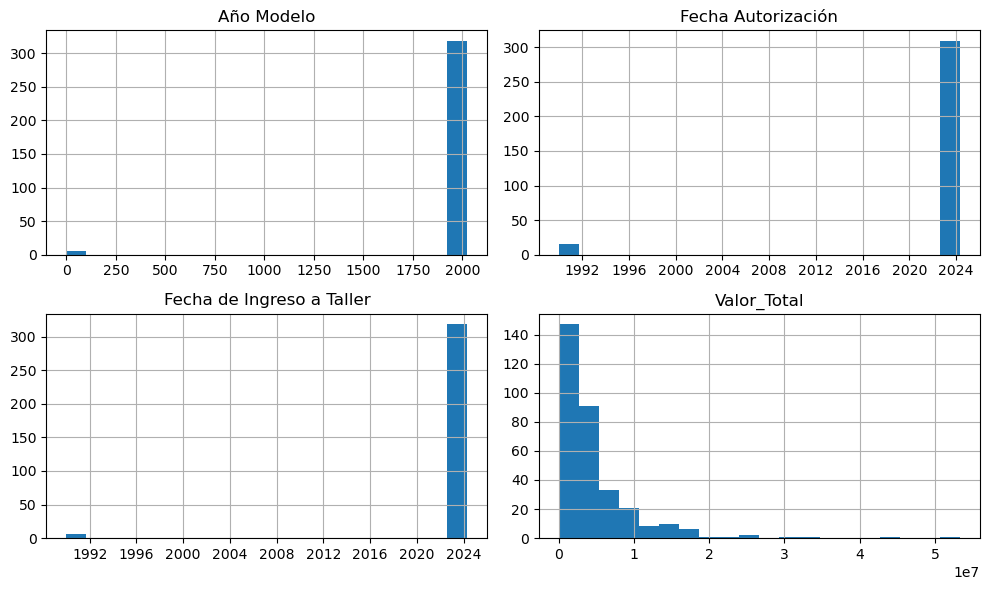

In [12]:
# Visualización de la distribución de los datos
data.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()



In [13]:
# Crear un informe
informe = f"""
Información general:
{informacion_general}

Estadísticas descriptivas:
{estadisticas_descriptivas}

Valores nulos:
{valores_nulos}

Integridad de los datos (% de filas sin valores nulos):
{integridad:.2f}%



Visualización de la distribución de los datos:
(Se adjunta gráfico)
"""

# Guardar el informe en un archivo
with open('informe.txt', 'w') as file:
    file.write(informe)
